<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

In [171]:
#Name:Jiyuan Wang
#Github Username:Patrickgogogo123
#USC ID:8818040169

Package imports

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from numpy.linalg import pinv


import numpy as np


Get the Vertebral Column Data Set

In [173]:
columns = [
    "pelvic_incidence",     
    "pelvic_tilt",          
    "lumbar_lordosis_angle",
    "sacral_slope",         
    "pelvic_radius",        
    "degree_spondylolisthesis",
    "class"                  
]

dataSet = pd.read_csv('../data/vertebral_column_data/column_2C.dat',sep=r'\s+',header=None,names=columns)
print(dataSet.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis class  
0          98.67                     -0.25    AB  
1         114.41                      4.56    AB  
2         105.99                     -3.53    AB  
3         101.87                     11.21    AB  
4         108.17                      7.92    AB  


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

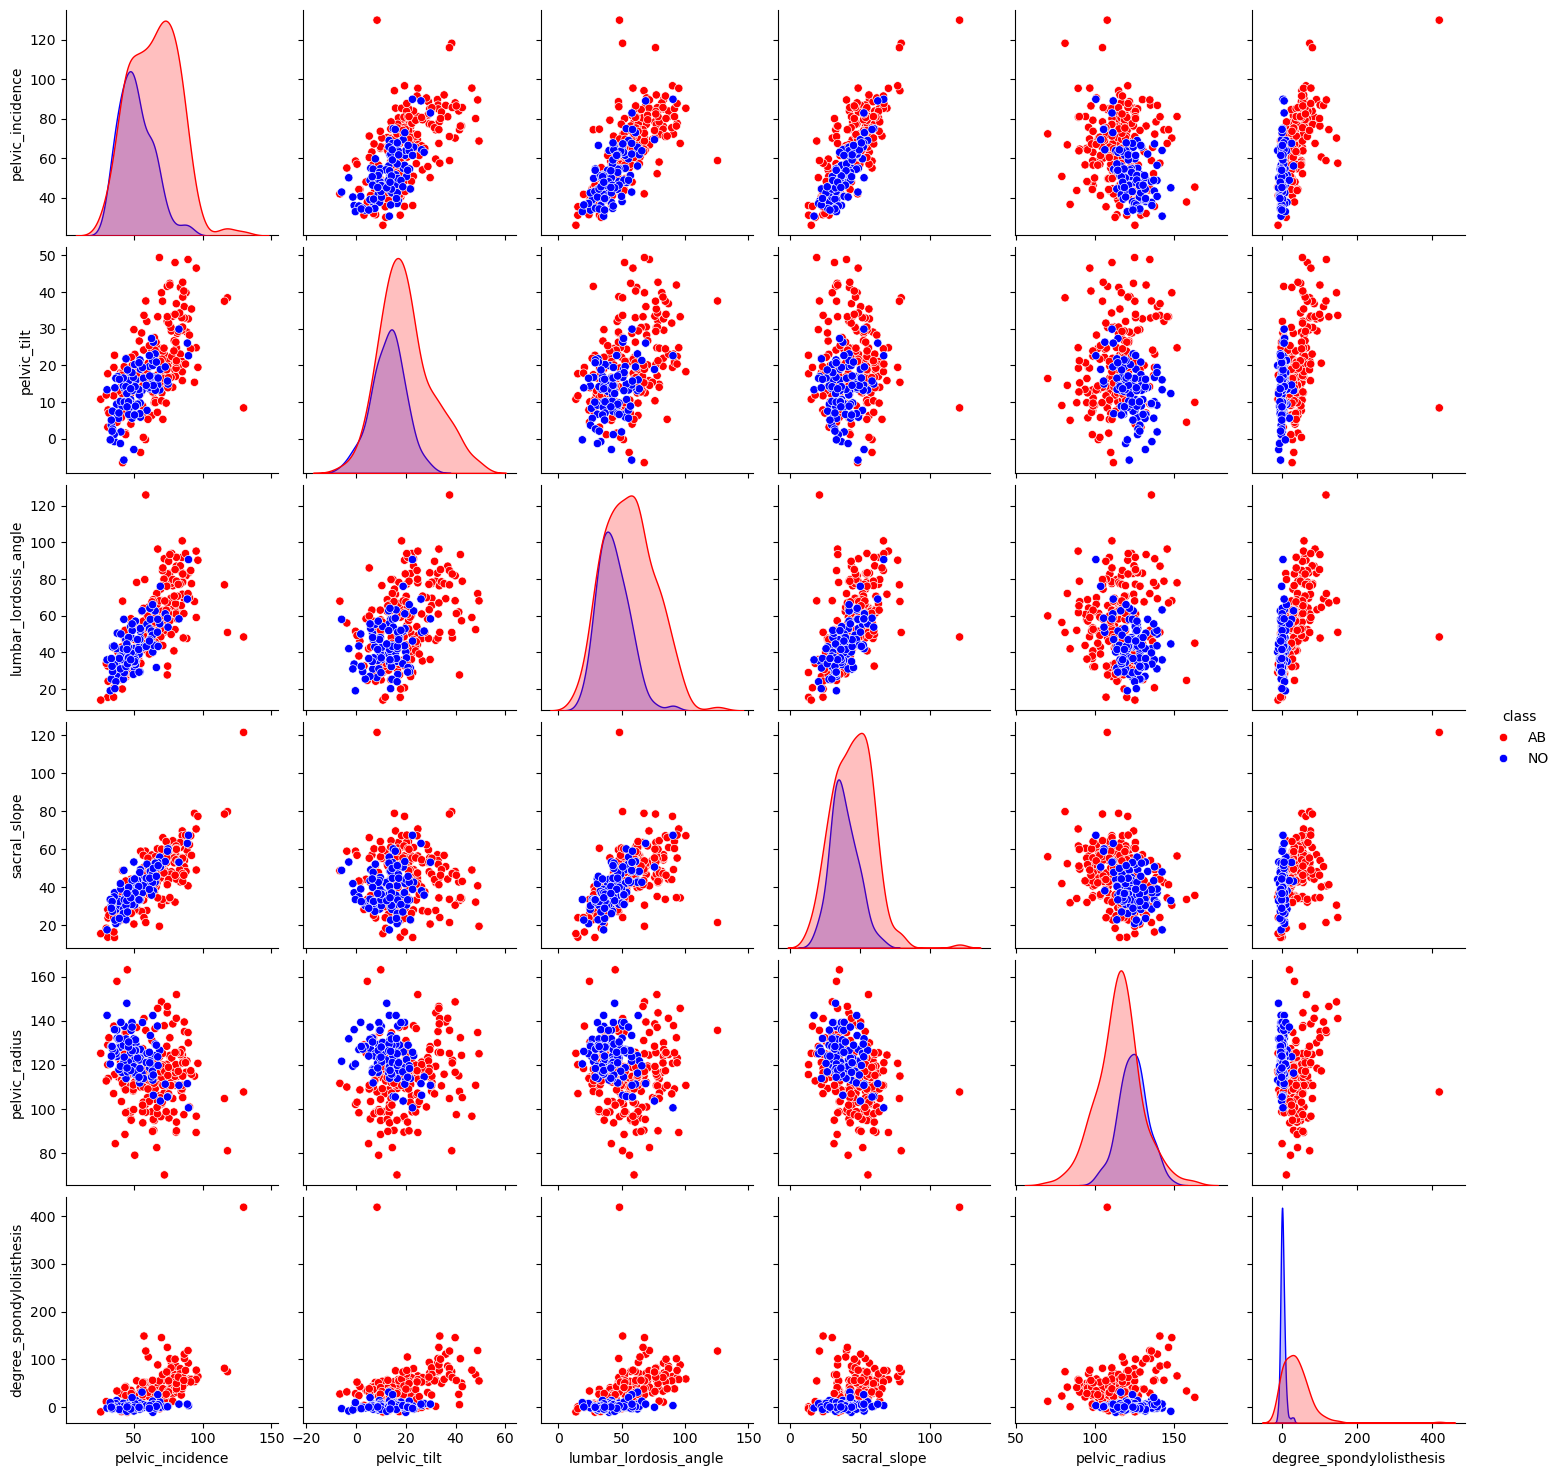

In [174]:
sns.pairplot(dataSet, hue="class", palette={"AB": "red", "NO": "blue"}, height=2.5)

#### ii. Boxplots

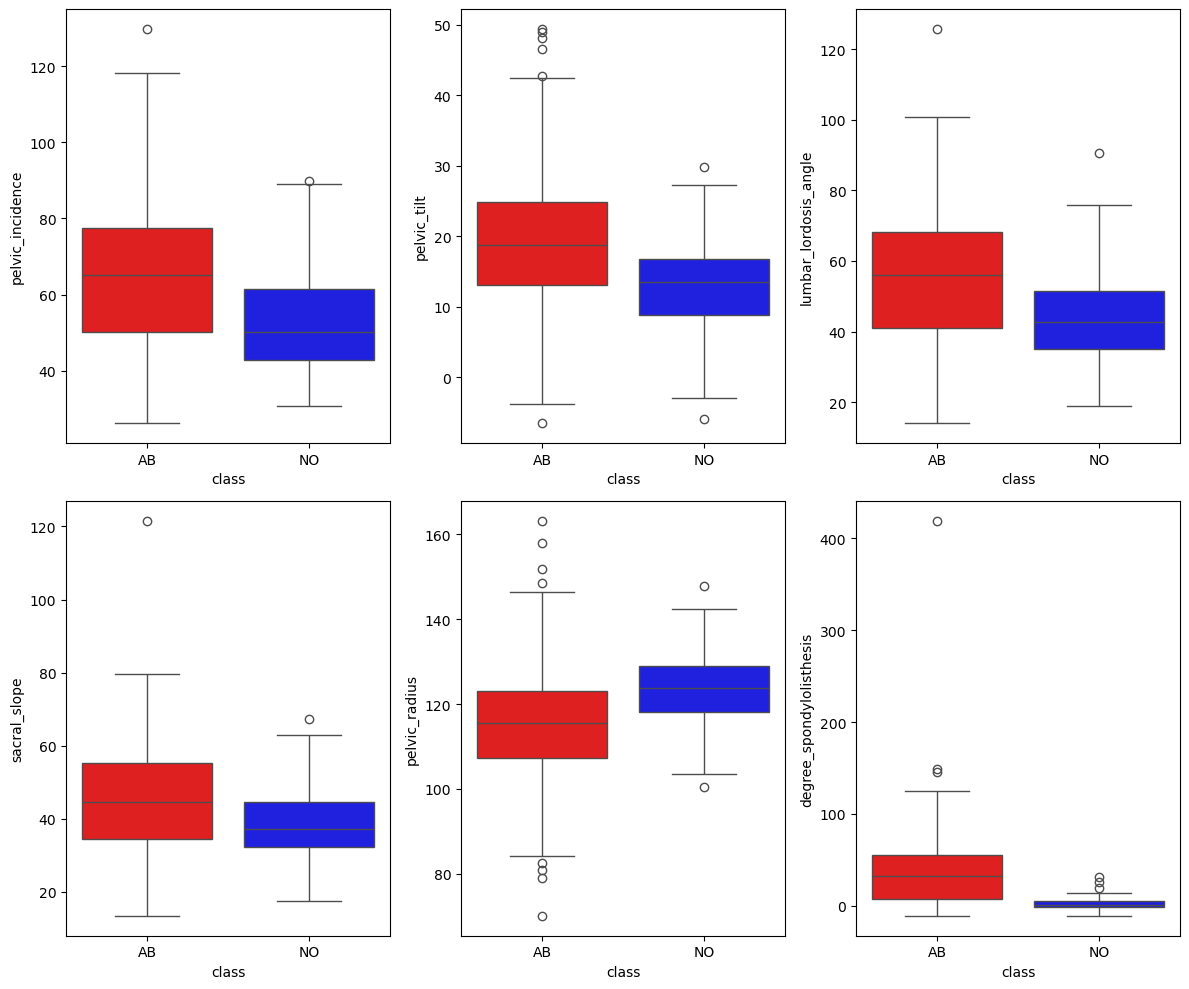

In [175]:
plt.figure(figsize=(12, 10))

for index, column in enumerate(dataSet.columns[:-1]):
    plt.subplot(2,3, index+1)
    sns.boxplot(x='class', y=column,hue='class',data=dataSet, palette={"AB": "red", "NO": "blue"})
plt.tight_layout()  

#### iii. Split Data Set

In [176]:
trainingSet = pd.concat([
    dataSet[dataSet["class"] == 'NO'].iloc[:70],
    dataSet[dataSet["class"] == 'AB'].iloc[:140]
])

testingSet = dataSet.drop(trainingSet.index)
# print(trainingSet.shape, testingSet.shape)
# print(trainingSet,testingSet)
trainingSet['class'] = trainingSet['class'].map({'NO': 0, 'AB': 1})
testingSet['class']  = testingSet['class'].map({'NO': 0, 'AB': 1})

X_train = trainingSet.iloc[:, :-1]   
y_train = trainingSet.iloc[:, -1]    
X_test = testingSet.iloc[:, :-1]
y_test = testingSet.iloc[:, -1]

print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)



Training features shape: (210, 6)
Training labels shape: (210,)
Testing features shape: (100, 6)
Testing labels shape: (100,)


### (c) Classification

#### i. Euclidean Metric

In [177]:
knn = KNeighborsClassifier(n_neighbors=10, metric="euclidean")
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


#### ii. Test Data

The best k in testing data set is 4, the smallest test error is 0.0600, best k in training set is 10, the smallest train error is 0.1333


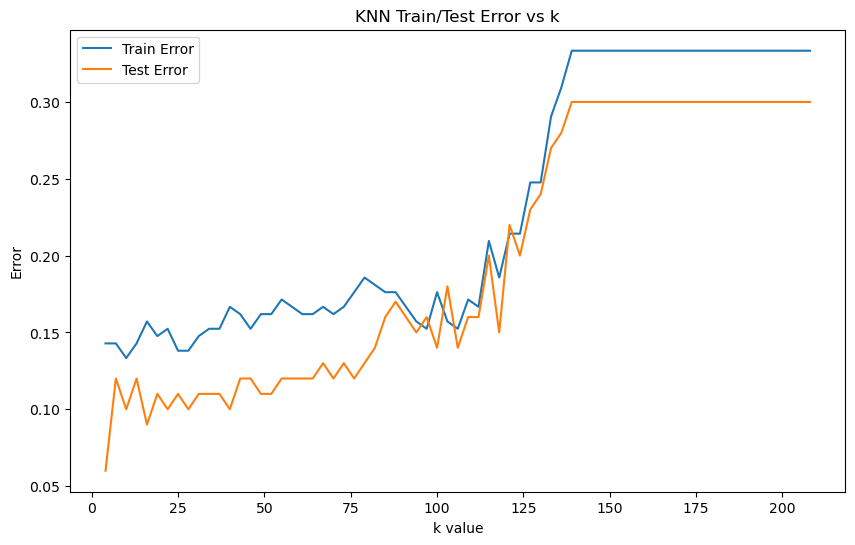

Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate (Recall): 0.9857
True Negative Rate (Specificity): 0.8333
Precision: 0.9324
F1 Score: 0.9583


In [178]:
klist = list(range(208,1,-3))

train_error = []
test_error = []

best_train_k = None
best_test_k = None

best_train_error = 1
best_test_error = 1

# repeat k in decrementing order
for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    
    # calculating training and testing error
    cur_train_error = 1 - knn.score(X_train, y_train)
    cur_test_error = 1 - knn.score(X_test, y_test)
    train_error.append(cur_train_error)
    test_error.append(cur_test_error)
    
    # update they discover the best k in testing or training 
    if cur_train_error < best_train_error:
        best_train_error = cur_train_error
        best_train_k = k

    if cur_test_error < best_test_error:
        best_test_error = cur_test_error
        best_test_k = k
        
print(f"The best k in testing data set is {best_test_k}, "
      f"the smallest test error is {best_test_error:.4f}, "
      f"best k in training set is {best_train_k}, "
      f"the smallest train error is {best_train_error:.4f}")

# Plot train vs test errors
plt.figure(figsize=(10, 6))
plt.plot(klist, train_error, label="Train Error")
plt.plot(klist, test_error, label="Test Error")
plt.xlabel("k value")
plt.ylabel("Error")
plt.title("KNN Train/Test Error vs k")
plt.legend()
plt.show()

# use the best k from testing data get all the evaluations 
knn_best = KNeighborsClassifier(n_neighbors=best_test_k, metric="euclidean")
knn_best.fit(X_train, y_train)

# Predict on test data
y_pred = knn_best.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate metrics
TPR = TP / (TP + FN)   # True Positive Rate 
TNR = TN / (TN + FP)   # True Negative Rate 
precision = TP / (TP + FP)
recall = TPR
F1 = 2 * (precision * recall) / (precision + recall)

print(f"True Positive Rate (Recall): {TPR:.4f}")
print(f"True Negative Rate (Specificity): {TNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {F1:.4f}")

#### iii. Learning Curve

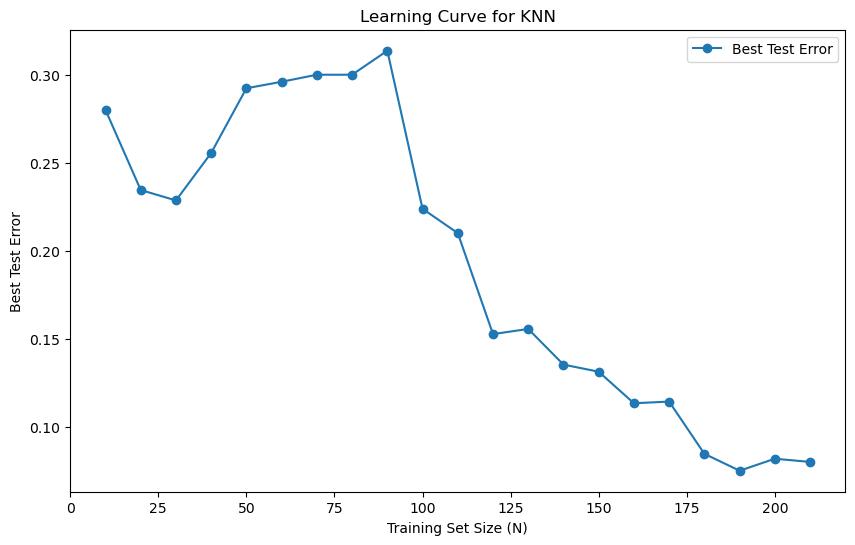

In [179]:
dataSet['class'] = dataSet['class'].map({'AB': 1, 'NO': 0})
trainingSet_number = list(range(10,211,10))
ks = list(range(1, 197, 5))

test_error = []
# print(dataSet)
for number in trainingSet_number:
    # seprate data from database and using for loop to control size of training set
    n_class0 = number // 3
    n_class1 = number - n_class0
    train_data = pd.concat(
        [dataSet[dataSet["class"] == 0].iloc[:n_class0], 
         dataSet[dataSet["class"] == 1].iloc[:n_class1]]
    )
    train_X = train_data.iloc[:, :-1]
    train_Y = train_data.iloc[:, -1]
    
    test_data = dataSet.drop(train_data.index)
    test_X = test_data.iloc[:, :-1]
    test_Y = test_data.iloc[:, -1]
    
    
    best_error = 1
    best_k = None
    
    # using forloop try different ks and evaluate the model
    for k in ks:
        if k >= len(train_X):
            continue
        knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        knn.fit(train_X, train_Y)
        
        error = 1 - knn.score(test_X, test_Y)
        
        if error < best_error:
            best_error = error
            best_k = k    
        
    test_error.append(best_error)
    
plt.figure(figsize=(10,6))
plt.plot(trainingSet_number, test_error, marker="o", label="Best Test Error")
plt.xlabel("Training Set Size (N)")
plt.ylabel("Best Test Error")
plt.title("Learning Curve for KNN")
plt.legend()
plt.show()
        

    
    

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

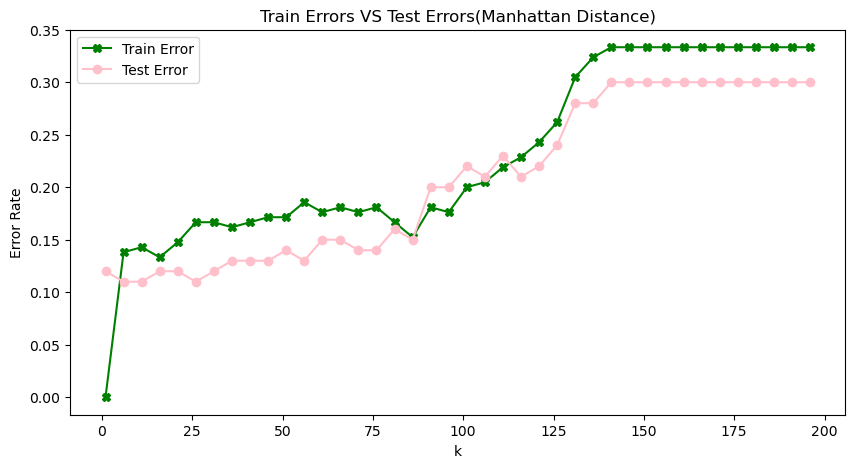

      k  Train Error  Test Error
0     1     0.000000        0.12
1     6     0.138095        0.11
2    11     0.142857        0.11
3    16     0.133333        0.12
4    21     0.147619        0.12
5    26     0.166667        0.11
6    31     0.166667        0.12
7    36     0.161905        0.13
8    41     0.166667        0.13
9    46     0.171429        0.13
10   51     0.171429        0.14
11   56     0.185714        0.13
12   61     0.176190        0.15
13   66     0.180952        0.15
14   71     0.176190        0.14
15   76     0.180952        0.14
16   81     0.166667        0.16
17   86     0.152381        0.15
18   91     0.180952        0.20
19   96     0.176190        0.20
20  101     0.200000        0.22
21  106     0.204762        0.21
22  111     0.219048        0.23
23  116     0.228571        0.21
24  121     0.242857        0.22
25  126     0.261905        0.24
26  131     0.304762        0.28
27  136     0.323810        0.28
28  141     0.333333        0.30
29  146   

In [195]:
ks = list(range(1, 197, 5))

# X_train
# y_train
# X_test 
# y_test 

manhattan_train_error = []
manhattan_test_error = []
results = []
manhattan_bestK = None


for k in ks:
    # use manhattan distance in knn 
    knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    knn.fit(X_train, y_train)
    
    # evaluation
    train_error = knn.score(X_train, y_train)
    manhattan_train_error.append(1 - train_error)
    
    test_error = knn.score(X_test, y_test)
    manhattan_test_error.append(1 - test_error)
    
    results.append({
        "k": k,
        "Train Error": 1- train_error,
        "Test Error": 1- test_error
    })

# Plot train and test error rates
plt.figure(figsize=(10, 5))
plt.plot(ks, manhattan_train_error, label="Train Error", marker='X', color="green") #print training error
plt.plot(ks, manhattan_test_error, label="Test Error", marker='o', color="pink") #print test error
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.legend()
plt.title("Train Errors VS Test Errors(Manhattan Distance)")
plt.show()

results_df = pd.DataFrame(results)

print(results_df)


# Select the best k values
best_k_2 = ks[np.argmin(manhattan_test_error)]  # choose the min k in test
print(f"Best k in test error: {best_k_2}")
print(f"Best k in test error: {min(manhattan_test_error):.3f}")
    

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [194]:

# setting parameters
log10_p_values = [10**x for x in np.arange(0.1,1.1,0.1)]
best_k_manhattan = best_k_2

test_errors = []
best_test_p = None
best_test_error = 1
# using minkowshi's way to calculate distance 
for p in log10_p_values:
    knn = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric="minkowski", p=p)
    knn.fit(X_train, y_train)
    error = 1 - knn.score(X_test, y_test)
    test_errors.append(error)
    
    if error < best_test_error:
        best_test_error = error
        best_test_p = p
    print(f" log10(p)={np.log10(p):.1f}, test error={error:.4f}")
print(f"Best test error: {best_test_error:.4f}, best test log10(p)={best_test_p:.4f}")

best_idx = np.argmin(test_errors)

 log10(p)=0.1, test error=0.0900
 log10(p)=0.2, test error=0.0900
 log10(p)=0.3, test error=0.0800
 log10(p)=0.4, test error=0.0800
 log10(p)=0.5, test error=0.0800
 log10(p)=0.6, test error=0.0600
 log10(p)=0.7, test error=0.0700
 log10(p)=0.8, test error=0.0800
 log10(p)=0.9, test error=0.0900
 log10(p)=1.0, test error=0.0900
Best test error: 0.0600, best test log10(p)=3.9811


##### C. Chebyshev Distance With p -> infinity.

In [189]:

test_error = []
best_k = None
best_test_error = 1

for k in ks:
    knn_cheb = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    knn_cheb.fit(X_train, y_train)
    
    cheb_train_err = 1.0 - knn_cheb.score(X_train, y_train)
    cheb_test_err  = 1.0 - knn_cheb.score(X_test, y_test)
    
    if cheb_test_err < best_test_error:
        best_test_error = cheb_test_err
        best_k = k
    
    test_error.append(cheb_test_err)
    print(f" when k is {k}, test error: {cheb_test_err:.4f}")
print(f" best test error: {best_test_error:.4f}, best k: {best_k}")
    
    

 when k is 1, test error: 0.1300
 when k is 6, test error: 0.1000
 when k is 11, test error: 0.1200
 when k is 16, test error: 0.0800
 when k is 21, test error: 0.1100
 when k is 26, test error: 0.1200
 when k is 31, test error: 0.1200
 when k is 36, test error: 0.1000
 when k is 41, test error: 0.1300
 when k is 46, test error: 0.1200
 when k is 51, test error: 0.1200
 when k is 56, test error: 0.1200
 when k is 61, test error: 0.1400
 when k is 66, test error: 0.1300
 when k is 71, test error: 0.1400
 when k is 76, test error: 0.1100
 when k is 81, test error: 0.1400
 when k is 86, test error: 0.1200
 when k is 91, test error: 0.1500
 when k is 96, test error: 0.1400
 when k is 101, test error: 0.1900
 when k is 106, test error: 0.1800
 when k is 111, test error: 0.1800
 when k is 116, test error: 0.1900
 when k is 121, test error: 0.2100
 when k is 126, test error: 0.2100
 when k is 131, test error: 0.2500
 when k is 136, test error: 0.2800
 when k is 141, test error: 0.3000
 when k

#### ii. Mahalanobis Distance.

In [203]:
test_error = []
best_k = None
best_test_error = 1

cov_matrix = np.cov(train_X, rowvar=False) 
inv_cov_matrix = pinv(cov_matrix) 

for k in ks:
    knn_maha = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI': inv_cov_matrix})
    knn_maha.fit(X_train, y_train)
    
    maha_test_err = 1.0 - knn_maha.score(X_test, y_test)
    if maha_test_err < best_test_error:
        best_test_error = maha_test_err
        best_k = k
    test_error.append(maha_test_err)
    print(f" when k is {k}, test error: {maha_test_err:.4f}")
print(f"Best test error: {best_test_error:.4f}, best k: {best_k}")
    

 when k is 1, test error: 0.1700
 when k is 6, test error: 0.1700
 when k is 11, test error: 0.2000
 when k is 16, test error: 0.2000
 when k is 21, test error: 0.2100
 when k is 26, test error: 0.2000
 when k is 31, test error: 0.2300
 when k is 36, test error: 0.2100
 when k is 41, test error: 0.2400
 when k is 46, test error: 0.2400
 when k is 51, test error: 0.2400
 when k is 56, test error: 0.2600
 when k is 61, test error: 0.2500
 when k is 66, test error: 0.2700
 when k is 71, test error: 0.2600
 when k is 76, test error: 0.2500
 when k is 81, test error: 0.2400
 when k is 86, test error: 0.2600
 when k is 91, test error: 0.2600
 when k is 96, test error: 0.2600
 when k is 101, test error: 0.2800
 when k is 106, test error: 0.2800
 when k is 111, test error: 0.3100
 when k is 116, test error: 0.2900
 when k is 121, test error: 0.3000
 when k is 126, test error: 0.3000
 when k is 131, test error: 0.3000
 when k is 136, test error: 0.3000
 when k is 141, test error: 0.3000
 when k

### (e) Weighted Decision

In [211]:
def weighted_knn(metric,**metric_kwargs):
    best_test_error = 1
    best_test_k = None
    
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, **metric_kwargs, weights="distance",)
        knn.fit(X_train, y_train)
        error = 1 - knn.score(X_test, y_test)
        
        if error < best_test_error:
            best_test_error = error
            best_k = k
    return  best_error,best_k


# Euclidean (L2): minkowski with p=2
eucl_err, eucl_k = weighted_knn("minkowski", p=2)

# Manhattan (L1): minkowski with p=1
manh_err, manh_k = weighted_knn("minkowski", p=1)

# Chebyshev (L∞)
cheb_err, cheb_k = weighted_knn("chebyshev")

print(f"Euclidean  (L2): best test error = {eucl_err:.4f} at k={eucl_k}")
print(f"Manhattan  (L1): best test error = {manh_err:.4f} at k={manh_k}")
print(f"Chebyshev (L∞): best test error = {cheb_err:.4f} at k={cheb_k}")

Euclidean  (L2): best test error = 0.0800 at k=6
Manhattan  (L1): best test error = 0.0800 at k=26
Chebyshev (L∞): best test error = 0.0800 at k=16


### (f) Training Error Rate

The lowest trainning error i got so far is 0.07